# RL Project Checkpoint 1

<br>
I/we certify that the code and data in this assignment were generated independently, using only the
tools and resources defined in the course and that I/we did not receive any external help, coaching or
contributions during the production of this work.
<br>

### Exploring the environment

In [1]:
from flatland.envs.rail_env import RailEnv
from flatland.envs.rail_generators import sparse_rail_generator
from flatland.envs.line_generators import sparse_line_generator
from flatland.envs.observations import GlobalObsForRailEnv
from flatland.envs.observations import TreeObsForRailEnv


rail_generator = sparse_rail_generator(max_num_cities=2)
tree_observation = TreeObsForRailEnv(max_depth=2)

# Initialize the properties of the environment
random_env = RailEnv(
    width=24,
    height=24,
    number_of_agents=2,
    rail_generator=rail_generator,
    line_generator=sparse_line_generator(),
    obs_builder_object=tree_observation
)


# Call reset() to initialize the environment
observation, info = random_env.reset()


/Users/aryansaini/Documents/EAS Semester 2/RL/venv/lib/python3.9/site-packages/flatland/envs/rail_generators.py:350: UserWarning: Could not set all required cities! Created 1/2
  warnings.warn(city_warning)
/Users/aryansaini/Documents/EAS Semester 2/RL/venv/lib/python3.9/site-packages/flatland/envs/rail_generators.py:262: UserWarning: [WARNING] Changing to Grid mode to place at least 2 cities.
  warnings.warn("[WARNING] Changing to Grid mode to place at least 2 cities.")


In [2]:
#printing the observations 
print(observation)
print(info)

{0: Node(dist_own_target_encountered=0, dist_other_target_encountered=0, dist_other_agent_encountered=0, dist_potential_conflict=0, dist_unusable_switch=0, dist_to_next_branch=0, dist_min_to_target=34.0, num_agents_same_direction=0, num_agents_opposite_direction=0, num_agents_malfunctioning=0, speed_min_fractional=1.0, num_agents_ready_to_depart=0, childs={'L': -inf, 'F': Node(dist_own_target_encountered=inf, dist_other_target_encountered=inf, dist_other_agent_encountered=inf, dist_potential_conflict=inf, dist_unusable_switch=inf, dist_to_next_branch=2, dist_min_to_target=32.0, num_agents_same_direction=0, num_agents_opposite_direction=0, num_agents_malfunctioning=0, speed_min_fractional=1.0, num_agents_ready_to_depart=0, childs={'L': -inf, 'F': Node(dist_own_target_encountered=inf, dist_other_target_encountered=inf, dist_other_agent_encountered=inf, dist_potential_conflict=inf, dist_unusable_switch=3, dist_to_next_branch=25, dist_min_to_target=9.0, num_agents_same_direction=0, num_age

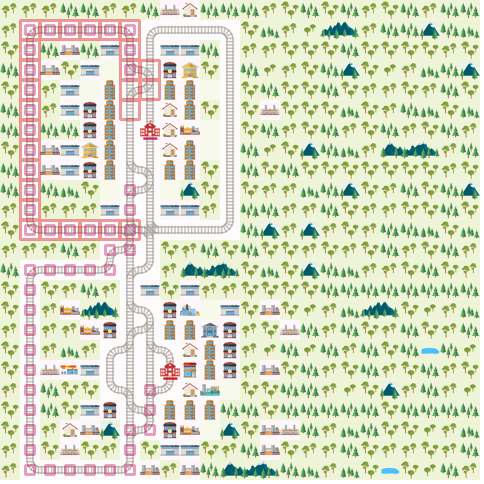

In [3]:
import PIL
from flatland.utils.rendertools import RenderTool
from IPython.display import clear_output


# Render the environment
def render_env(env,wait=True):
    
    env_renderer = RenderTool(env, gl="PILSVG")
    env_renderer.render_env()

    image = env_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    clear_output(wait=True)
    display(pil_image)

render_env(random_env)

In [4]:
class RandomController:
    def __init__(self, action_size):
        self.action_size = action_size

    def act(self, observations):
        actions = dict()
        for agent_handle, observation in enumerate(observations):
            action = np.random.randint(self.action_size)
            actions.update({agent_handle: action})
        return actions

In [7]:
import numpy as np
from flatland.envs.rail_env import RailEnvActions

controller = RandomController(random_env.action_space[0])
observations, info = random_env.reset()
actions = controller.act(observations)

# Perform a single action per agent
for (handle, action) in actions.items():
    print('Agent {} will perform action {} ({})'.format(handle, action, RailEnvActions.to_char(action)))
    next_obs, all_rewards, dones, info = random_env.step({handle: action})

print('Rewards for each agent: {}'.format(all_rewards))
print('Done for each agent: {}'.format(dones))
print('Misc info: {}'.format(info))

Agent 0 will perform action 2 (F)
Agent 1 will perform action 2 (F)
Rewards for each agent: {0: 0, 1: 0}
Done for each agent: {0: False, 1: False, '__all__': False}
Misc info: {'action_required': {0: True, 1: False}, 'malfunction': {0: 0, 1: 0}, 'speed': {0: 1.0, 1: 1.0}, 'state': {0: <TrainState.READY_TO_DEPART: 1>, 1: <TrainState.WAITING: 0>}}


In [8]:
def run_episode(env):
    controller = RandomController(env.action_space[0])
    observations, info = env.reset()

    score = 0
    actions = dict()

    for step in range(50):

        actions = controller.act(observations)
        next_observations, all_rewards, dones, info = env.step(actions)
        for agent_handle in env.get_agent_handles():
            score += all_rewards[agent_handle]

        render_env(env)
        print('Timestep {}, total score = {}'.format(step, score))

        if dones['__all__']:
            print('All done!')
            return

    print("Episode didn't finish after 50 timesteps.")

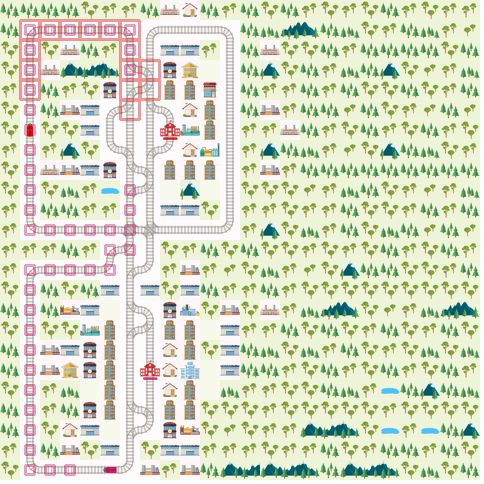

Timestep 25, total score = -81
All done!


In [9]:
run_episode(random_env)

In [10]:
from collections import deque

width=24
height=24

action_size = 5

# Max number of steps per episode
# This is the official formula used during evaluations
max_steps = 100

action_dict = dict()

# And some variables to keep track of the progress
scores_window = deque(maxlen=100)  # todo smooth when rendering instead
completion_window = deque(maxlen=100)
scores = []
completion = []
action_count = [0] * action_size
agent_obs = [None] * random_env.get_num_agents()
agent_prev_obs = [None] * random_env.get_num_agents()
agent_prev_action = [2] * random_env.get_num_agents()
update_values = False

# Observation parameters
observation_tree_depth = 2
observation_radius = 10




## Q_learning


In [ ]:
import numpy as np
from flatland.envs.observations import TreeObsForRailEnv

def get_min_max(sequence, value, Max_Flag):
    max = 0
    min = np.inf
    index = len(sequence) - 1
    while index >= 0:
        if Max_Flag:
            if sequence[index] < value and sequence[index] >= 0 and sequence[index] > max:
                max = sequence[index]
            index -= 1
        else:
            if sequence[index] >= value and sequence[index] < min:
                min = sequence[index]
            index -= 1
    if Max_Flag:
        return max
    else:
        return min


def normalized_clip(obs, max_clip=1, min_clip=-1,  radius=0, normalized_flag=True):
    """
    returns the difference between min and max value of an observation
    """
    if radius > 0:
        max_obs = radius
    else:
        max_obs = max(1, get_min_max(obs, 1000,True)) + 1

    min_obs = 0  
    
    if normalized_flag:
        min_obs = get_min_max(obs, 0,False)
    if min_obs > max_obs:
        min_obs = max_obs
    if max_obs == min_obs:
        return np.clip(np.array(obs) / max_obs, min_clip, max_clip)
    norm = np.abs(max_obs - min_obs)
    return np.clip((np.array(obs) - min_obs) / norm, min_clip, max_clip)


def _split_nodes(node) :
    data = np.zeros(6)
    distance = np.zeros(1)
    agent_data = np.zeros(4)
    
    node_list =[data, distance, agent_data]
    
    node_list[0][0] = node.dist_own_target_encountered
    node_list[0][1] = node.dist_other_target_encountered
    node_list[0][2] = node.dist_other_agent_encountered
    node_list[0][3] = node.dist_potential_conflict
    node_list[0][4] = node.dist_unusable_switch
    node_list[0][5] = node.dist_to_next_branch

    node_list[1][0] = node.dist_min_to_target

    node_list[2][0] = node.num_agents_same_direction
    node_list[2][1] = node.num_agents_opposite_direction
    node_list[2][2] = node.num_agents_malfunctioning
    node_list[2][3] = node.speed_min_fractional

    
    return node_list


def _split_subtree(node, current_tree_depth: int, max_tree_depth: int):
    if node == -np.inf:
        remaining_depth = max_tree_depth - current_tree_depth
        # reference: https://stackoverflow.com/questions/515214/total-number-of-nodes-in-a-tree-data-structure
        num_remaining_nodes = int((4 ** (remaining_depth + 1) - 1) / (4 - 1))
        return [-np.inf] * num_remaining_nodes * 6, [-np.inf] * num_remaining_nodes, [-np.inf] * num_remaining_nodes * 4

    node_list = _split_nodes(node)

    if not node.childs:   
        return node_list
    

    for direction in TreeObsForRailEnv.tree_explored_actions_char:
        sub_data_list = _split_subtree(node.childs[direction], current_tree_depth + 1, max_tree_depth)
        node_list[0] = np.concatenate((node_list[0], sub_data_list[0]))
        node_list[1] = np.concatenate((node_list[1], sub_data_list[1]))
        node_list[2] = np.concatenate((node_list[2], sub_data_list[2]))

    return node_list


def split_tree(tree, max_tree_depth: int):
    """
    This function splits the tree into three difference arrays of values
    """
    node_sub_list = _split_nodes(tree)

    for direction in TreeObsForRailEnv.tree_explored_actions_char:
        sub_data_list = _split_subtree(tree.childs[direction], 1, max_tree_depth)
        node_sub_list[0] = np.concatenate((node_sub_list[0], sub_data_list[0]))
        node_sub_list[1] = np.concatenate((node_sub_list[1], sub_data_list[1]))
        node_sub_list[2] = np.concatenate((node_sub_list[2], sub_data_list[2]))

    return node_sub_list


def normalize_obs(observation, tree_depth: int, observation_radius=0):
    """
    This function normalizes the observation used by the RL algorithm
    """
    node_list = split_tree(observation, tree_depth)

    node_list[0] = normalized_clip(node_list[0], radius=observation_radius, normalized_flag=False)
    node_list[1] = normalized_clip(node_list[1])
    node_list[2] = np.clip(node_list[2], -1, 1)
    normalized_observation = np.concatenate((np.concatenate((node_list[0], node_list[1])), node_list[2]))
    return normalized_observation



In [15]:
#Implementing Q learning 
import random

controller = RandomController(random_env.action_space[0])
observations, info = random_env.reset()
actions = controller.act(observations)
def random_Action():
    
    actions = controller.act(observations)

    # Perform a single action per agent
    for (handle, action) in actions.items():
        print('Agent {} will perform action {} ({})'.format(handle, action, RailEnvActions.to_char(action)))
        next_obs, all_rewards, dones, info = random_env.step({handle: action})
    return actions     

def get_int_action(action_dict):
    for i, j in action_dict.items():
        action_val = j
    return action_val        


def q_learning(env, num_episodes, discount_factor = 0.8, alpha = 0.1, eps = None):
    observation_space=GlobalObsForRailEnv()
    
    n_features_per_node = env.obs_builder.observation_dim
    n_nodes = 0
    for i in range(observation_tree_depth + 1):
        n_nodes += np.power(4, i)
    state_size = n_features_per_node * n_nodes
    
    
    q_table = [np.zeros([state_size, env.action_space[0]])] * 2
      
    epsilons = np.logspace(np.log10(0.8), np.log10(0.1), num=num_episodes) if eps is None else eps
    for _ in range(num_episodes):
        state = env.reset()
        done = False
        steps = 0
        rewards = 0
        epsilon = epsilons[_]
        
        score = 0
        agent_obs = [None] * env.get_num_agents()
        agent_prev_obs = [None] * env.get_num_agents()
        agent_prev_action = [2] * env.get_num_agents()
        state_indexes = [None] * env.get_num_agents()

        # Reset environment
        obs, info = env.reset(regenerate_rail=True, regenerate_schedule=True)
        # Build agent specific observations
        for agent in env.get_agent_handles():
            if obs[agent]:
                agent_obs[agent] = normalize_obs(obs[agent], observation_tree_depth, observation_radius=observation_radius)
                agent_prev_obs[agent] = agent_obs[agent].copy()

        while not done:
            steps += 1
            action_prob = random.random() # Spills out a number between 0 and 1
            action_dict = {}
            for agent in env.get_agent_handles():
                flattened_obs = list(agent_obs[agent].flatten())
                state_indexes[agent] = flattened_obs.index(max(flattened_obs))
                if action_prob < epsilon:
                    action_dict.update({agent: random.choice(range(5))})
                else:    
                    action_dict.update({agent: flattened_obs.index(max(flattened_obs))%5})

            next_state, reward, done, info = env.step(action_dict)
            
            for agent in env.get_agent_handles():                
                old_value = q_table[agent][state_indexes[agent], action_dict[agent]]

                # next_max = np.max(q_table[next_state[agent]])
                next_state[agent] = normalize_obs(next_state[agent], observation_tree_depth, observation_radius=observation_radius)
                next_max = np.max(next_state[agent].flatten())
                new_value = (1 - alpha) * old_value + alpha * (reward[agent] + discount_factor * next_max)

                q_table[agent][state_indexes[agent], action_dict[agent]] = new_value

                state = next_state

                rewards += reward[agent]
    

    return q_table

In [16]:
class RandomController:
    def __init__(self, action_size):
        self.action_size = action_size

    def act(self, observations):
        actions = dict()
        for agent_handle, observation in enumerate(observations):
            action = np.random.randint(self.action_size)
            actions.update({agent_handle: action})
        return actions

In [17]:
#This code throws an error for observation space 
env = RailEnv(
        width=24,
        height=24,
        rail_generator=sparse_rail_generator(
            max_num_cities=2,
            grid_mode=False,
            max_rails_between_cities=2,
            # max_rails_in_city=3
        ),
        # schedule_generator=sparse_schedule_generator(),
        number_of_agents=2,
        obs_builder_object=tree_observation
    )

Q = q_learning(env, 200)

In [18]:
#Printing the Q table 
Q

[array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])]

In [19]:
obs, info = env.reset(regenerate_rail=True, regenerate_schedule=True)
# normalize_observation(obs[1], observation_tree_depth, observation_radius=observation_radius)
obs[1].childs

{'L': -inf,
 'F': Node(dist_own_target_encountered=inf, dist_other_target_encountered=inf, dist_other_agent_encountered=inf, dist_potential_conflict=inf, dist_unusable_switch=1, dist_to_next_branch=28, dist_min_to_target=6.0, num_agents_same_direction=0, num_agents_opposite_direction=0, num_agents_malfunctioning=0, speed_min_fractional=1.0, num_agents_ready_to_depart=0, childs={'L': -inf, 'F': Node(dist_own_target_encountered=inf, dist_other_target_encountered=inf, dist_other_agent_encountered=inf, dist_potential_conflict=inf, dist_unusable_switch=29, dist_to_next_branch=34, dist_min_to_target=36.0, num_agents_same_direction=0, num_agents_opposite_direction=0, num_agents_malfunctioning=0, speed_min_fractional=1.0, num_agents_ready_to_depart=0, childs={}), 'R': Node(dist_own_target_encountered=inf, dist_other_target_encountered=inf, dist_other_agent_encountered=inf, dist_potential_conflict=inf, dist_unusable_switch=inf, dist_to_next_branch=30, dist_min_to_target=4.0, num_agents_same_dir

# Solving Flatland using DQN

### Importing libs

In [20]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import namedtuple, deque, Iterable
import torch.nn as nn
import torch.nn.functional as F

from flatland.envs.rail_env import RailEnv
from flatland.envs.rail_generators import sparse_rail_generator
from flatland.envs.line_generators import sparse_line_generator
from flatland.envs.observations import GlobalObsForRailEnv
from flatland.envs.observations import TreeObsForRailEnv

/var/folders/48/l14403_9457144q4v0_bsdzh0000gn/T/ipykernel_21111/3582709690.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import namedtuple, deque, Iterable


### Declaring our network

In [39]:
class Q_Network(nn.Module):
    """
    Class for Q Network.
    Parameters:
    1. num_states = Number of states of the environment.
    2. num_actions = Number of actions in the action space of the environment.
    
    Our neural net has 1 hidden layer, num_states inputs and num_actions outputs.
    """
    def __init__(self, num_states, num_actions):
        super(Q_Network, self).__init__()
        self.fc1 = nn.Linear(num_states, 128)
        self.fc2 = nn.Linear(128,64)
        self.out = nn.Linear(64,num_actions)
                
    def forward(self,x):
        x = x.to(torch.float32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)
    


### Declaring our memory

In [38]:
Experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

class ReplayMemory:
    """
    Class for Replay Buffer.
    Parameters:
    1. memory_capacity = Maximum number of records we want to save in our dataset.
    
    Notes
    ======
    1. We are setting the batch_size = BATCH_SIZE.
    """
    def __init__(self, memory_capacity, batch_size):
        self.memory = deque(maxlen=memory_capacity)
        self.batch_size = BATCH_SIZE

    def memorize(self, state, action, reward, next_state, done):
        """ Method to memorize transition of an agent"""
        e = Experience(np.expand_dims(state, 0), action, reward, np.expand_dims(next_state, 0), done)
        self.memory.append(e)

    def sample(self):
        """Randomly sample a batch of transitions from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(self.reshape_ndarray([e.state for e in experiences if e is not None])) \
            .float()
        actions = torch.from_numpy(self.reshape_ndarray([e.action for e in experiences if e is not None])) \
            .long()
        rewards = torch.from_numpy(self.reshape_ndarray([e.reward for e in experiences if e is not None])) \
            .float()
        next_states = torch.from_numpy(self.reshape_ndarray([e.next_state for e in experiences if e is not None])) \
            .float()
        dones = torch.from_numpy(self.reshape_ndarray([e.done for e in experiences if e is not None]).astype(np.uint8)) \
            .float()

        return states, actions, rewards, next_states, dones
    
    def reshape_ndarray(self, states):
        sub_dim = len(states[0][0]) if isinstance(states[0], Iterable) else 1
        np_states = np.reshape(np.array(states), (len(states), sub_dim))
        return np_states

    def __len__(self):
        return len(self.memory)

    

### Utility methods to process state and observations

In [40]:
import numpy as np
from flatland.envs.observations import TreeObsForRailEnv

def get_min_max(sequence, value, Max_Flag):
    max = 0
    min = np.inf
    index = len(sequence) - 1
    while index >= 0:
        if Max_Flag:
            if sequence[index] < value and sequence[index] >= 0 and sequence[index] > max:
                max = sequence[index]
            index -= 1
        else:
            if sequence[index] >= value and sequence[index] < min:
                min = sequence[index]
            index -= 1
    if Max_Flag:
        return max
    else:
        return min


def normalized_clip(obs, max_clip=1, min_clip=-1,  radius=0, normalized_flag=True):
    """
    returns the difference between min and max value of an observation
    """
    if radius > 0:
        max_obs = radius
    else:
        max_obs = max(1, get_min_max(obs, 1000,True)) + 1

    min_obs = 0  
    
    if normalized_flag:
        min_obs = get_min_max(obs, 0,False)
    if min_obs > max_obs:
        min_obs = max_obs
    if max_obs == min_obs:
        return np.clip(np.array(obs) / max_obs, min_clip, max_clip)
    norm = np.abs(max_obs - min_obs)
    return np.clip((np.array(obs) - min_obs) / norm, min_clip, max_clip)


def _split_nodes(node) :
    data = np.zeros(6)
    distance = np.zeros(1)
    agent_data = np.zeros(4)
    
    node_list =[data, distance, agent_data]
    
    node_list[0][0] = node.dist_own_target_encountered
    node_list[0][1] = node.dist_other_target_encountered
    node_list[0][2] = node.dist_other_agent_encountered
    node_list[0][3] = node.dist_potential_conflict
    node_list[0][4] = node.dist_unusable_switch
    node_list[0][5] = node.dist_to_next_branch

    node_list[1][0] = node.dist_min_to_target

    node_list[2][0] = node.num_agents_same_direction
    node_list[2][1] = node.num_agents_opposite_direction
    node_list[2][2] = node.num_agents_malfunctioning
    node_list[2][3] = node.speed_min_fractional

    
    return node_list


def _split_subtree(node, current_tree_depth: int, max_tree_depth: int):
    if node == -np.inf:
        remaining_depth = max_tree_depth - current_tree_depth
        # reference: https://stackoverflow.com/questions/515214/total-number-of-nodes-in-a-tree-data-structure
        num_remaining_nodes = int((4 ** (remaining_depth + 1) - 1) / (4 - 1))
        return [-np.inf] * num_remaining_nodes * 6, [-np.inf] * num_remaining_nodes, [-np.inf] * num_remaining_nodes * 4

    node_list = _split_nodes(node)

    if not node.childs:   
        return node_list
    

    for direction in TreeObsForRailEnv.tree_explored_actions_char:
        sub_data_list = _split_subtree(node.childs[direction], current_tree_depth + 1, max_tree_depth)
        node_list[0] = np.concatenate((node_list[0], sub_data_list[0]))
        node_list[1] = np.concatenate((node_list[1], sub_data_list[1]))
        node_list[2] = np.concatenate((node_list[2], sub_data_list[2]))

    return node_list


def split_tree(tree, max_tree_depth: int):
    """
    This function splits the tree into three difference arrays of values
    """
    node_sub_list = _split_nodes(tree)

    for direction in TreeObsForRailEnv.tree_explored_actions_char:
        sub_data_list = _split_subtree(tree.childs[direction], 1, max_tree_depth)
        node_sub_list[0] = np.concatenate((node_sub_list[0], sub_data_list[0]))
        node_sub_list[1] = np.concatenate((node_sub_list[1], sub_data_list[1]))
        node_sub_list[2] = np.concatenate((node_sub_list[2], sub_data_list[2]))

    return node_sub_list


def normalize_obs(observation, tree_depth: int, observation_radius=0):
    """
    This function normalizes the observation used by the RL algorithm
    """
    node_list = split_tree(observation, tree_depth)

    node_list[0] = normalized_clip(node_list[0], radius=observation_radius, normalized_flag=False)
    node_list[1] = normalized_clip(node_list[1])
    node_list[2] = np.clip(node_list[2], -1, 1)
    normalized_observation = np.concatenate((np.concatenate((node_list[0], node_list[1])), node_list[2]))
    return normalized_observation



### Main driver function

In [41]:
def dqn(env, num_episodes, discount_factor = 0.8, alpha = 0.1, eps = None):
    
    scores_window = deque(maxlen=100)
    completion_window = deque(maxlen=100)
    scores = []
    completion = []
    action_count = [0] * action_size
    agent_obs = [None] * env.get_num_agents()
    agent_prev_obs = [None] * env.get_num_agents()
    agent_prev_action = [2] * env.get_num_agents()
    update_values = False

    # Observation parameters
    observation_tree_depth = 2
    observation_radius = 10

    n_features_per_node = env.obs_builder.observation_dim
    n_nodes = 0
    for i in range(observation_tree_depth + 1):
        n_nodes += np.power(4, i)
    state_size = n_features_per_node * n_nodes
    
    eval_network = Q_Network(state_size, env.action_space[0])
    target_network = Q_Network(state_size, env.action_space[0])
    memory = ReplayMemory(5000, BATCH_SIZE)
    optimizer = optim.Adam(eval_network.parameters(), lr=0.001)
    scores = []
    completion = []
    action_count = [0] * action_size
    
    def get_action(state, eps):
        state = torch.from_numpy(state).float().unsqueeze(0)
        eval_network.eval()
        with torch.no_grad():
            action_values = eval_network(state)
        eval_network.train()

        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(range(env.action_space[0]))
    
    epsilons = np.logspace(np.log10(0.8), np.log10(0.1), num=num_episodes) if eps is None else eps
    for _ in range(num_episodes):
        state = env.reset()
        done = False
        steps = 0
        rewards = 0
        score = 0
        epsilon = epsilons[_]
        
        agent_obs = [None] * env.get_num_agents()
        agent_prev_obs = [None] * env.get_num_agents()
        agent_prev_action = [2] * env.get_num_agents()
        state_indexes = [None] * env.get_num_agents()

        # Reset environment
        obs, info = env.reset(regenerate_rail=True, regenerate_schedule=True)
        # Build agent specific observations
        for agent in env.get_agent_handles():
            if obs[agent]:
                agent_obs[agent] = normalize_obs(obs[agent], observation_tree_depth, observation_radius=observation_radius)
                agent_prev_obs[agent] = agent_obs[agent].copy()

        while True:
            steps += 1
            action_dict = {}
            
            for agent in env.get_agent_handles():
                action = get_action(agent_obs[agent], epsilon)
                action_dict.update({agent: action})
                action_count[action] += 1

            next_state, reward, done, info = env.step(action_dict)
            
            for agent in env.get_agent_handles():
                memory.memorize(agent_prev_obs[agent], agent_prev_action[agent], reward[agent], agent_obs[agent], done[agent])
                if len(memory) > BATCH_SIZE:
                    # Learning step
                    batch_state, batch_action, batch_reward, batch_next_state, batch_done = memory.sample()                
                    
                    q_expected = eval_network(batch_state).gather(1, batch_action)
                    q_targets_next = target_network(batch_next_state).detach().max(1)[0].unsqueeze(-1)
                    q_targets = batch_reward + (GAMMA * q_targets_next * (1 - batch_done))
                    
                    loss = F.mse_loss(q_expected, q_targets)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                    # Update target network
                    if _ % NETWORK_UPDATE_INTERVAL == 0:
                        target_network.load_state_dict(eval_network.state_dict())
                score += reward[agent]

                agent_prev_obs[agent] = agent_obs[agent].copy()
                agent_obs[agent] = normalize_obs(next_state[agent], observation_tree_depth, observation_radius=observation_radius)
                
            if done['__all__']:
                # Checking if all the agents have finished their episode
                break
            
        # Collection information about training
        tasks_finished = np.sum([int(done[idx]) for idx in env.get_agent_handles()])
        completion_window.append(tasks_finished / max(1, env.get_num_agents()))
        scores_window.append(score / (max_steps * env.get_num_agents()))
        completion.append((np.mean(completion_window)))
        scores.append(np.mean(scores_window))
        action_probs = action_count / np.sum(action_count)

        
        end = " "

        print('\rTraining {} agents on {}x{}\t Episode {}\t Average Score: {:.3f}\tDones: {:.2f}%\tEpsilon: {:.2f} \t Action Probabilities: \t {}'.format(
            env.get_num_agents(),
            24, 24,
            _,
            np.mean(scores_window),
            100 * np.mean(completion_window),
            epsilon,
            action_probs
        ), end=end)

    plt.plot(scores)
    plt.show()

    plt.plot(completion)
    plt.show()

    
    return eval_network, scores

### Running DQN on Flatland

Training 2 agents on 24x24	 Episode 4999	 Average Score: -0.263	Dones: 100.00%	Epsilon: 0.10 	 Action Probabilities: 	 [0.64251963 0.07238948 0.08437798 0.07703825 0.12367466] 

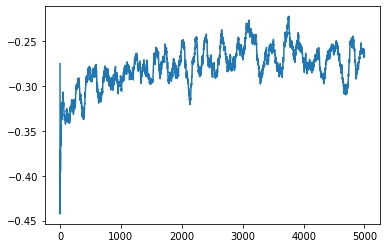

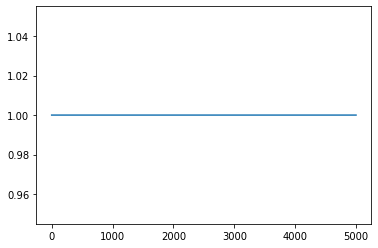

In [45]:
width=24
height=24

action_size = 5

# Max number of steps per episode
# This is the official formula used during evaluations
max_steps = 100
num_agents = 2
EPISODES = 5000

BATCH_SIZE = 128
GAMMA = 0.9
NETWORK_UPDATE_INTERVAL = 50

env = RailEnv(
        width=width,
        height=height,
        rail_generator=sparse_rail_generator(
            max_num_cities=2,
            grid_mode=False,
            max_rails_between_cities=2,
            # max_rails_in_city=3
        ),
        # schedule_generator=sparse_schedule_generator(),
        number_of_agents=num_agents,
        obs_builder_object=tree_observation
    )

Q, scores = dqn(env, EPISODES)